In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, LGBMRegressor
import lightgbm
import calendar
from datetime import datetime,date
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline
from xgboost.sklearn import XGBRegressor
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor
from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time
import sys
import gc
import pickle
sys.version_info

# Feature Selection
from sklearn.feature_selection import chi2, f_classif, f_regression
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile, VarianceThreshold

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [11]:
import numpy as np
import pandas as pd
import random
import os
SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

set_seed(SEED)

random_state = SEED

In [12]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
var = pd.read_csv('VariableDescription.csv')

test_id = test['ID']

train.shape, test.shape

((3870, 44), (1290, 43))

In [13]:
var.head(10)

,Variable,Description
0,District,Name of the district
1,Block,Name of the block
2,CultLand,Area of total cultivated land
3,CropCultLand,Area of land under cultivation
4,LandPreparationMethod,Method for land preparation
5,CropTillageDate,Date of tillage of the largest plot
6,CropTillageDepth,Depth of the tillage
7,CropEstMethod,Method of transplantation
8,RcNursEstDate,Date of nursery establishment
9,SeedingSowingTransplanting,Date of sowing/Transplanting the crop


In [14]:
# Preview train
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [15]:
# Preview test
test.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,2022-07-29,1.0,LabourAvailability IrrigWaterAvailability PreM...,IrrigWaterAvailability LaborAvailability RainA...,2.0,Boring,Diesel,200.0,2.0,FYM,NaN,2.0,SoilApplied,3,DAP,6.0,NaN,Broadcasting,Urea,8.0,23.0,6.0,63.0,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,2022-08-02,4.0,CalendarDate SeedAvailability IrrigWaterAvaila...,CalendarDate SeedlingAge IrrigWaterAvailabilit...,2.0,Canal,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3,DAP,5.0,NaN,Broadcasting,Urea,7.0,23.0,8.0,65.0,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,2022-07-08,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge RainArrival IrrigWaterAvailability...,4.0,Canal,NaN,NaN,10.0,Ganaura,2.0,NaN,Broadcasting,2,DAP Urea,9.0,18.0,Broadcasting,Urea,9.0,38.0,NaN,NaN,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,2022-07-10,2.0,CalendarDate IrrigWaterAvailability LabourAvai...,CalendarDate SeedlingAge RainArrival IrrigWate...,2.0,Boring,Diesel,NaN,NaN,FYM,NaN,5.0,SoilApplied,2,DAP,15.0,NaN,SoilApplied,Urea,9.0,30.0,NaN,NaN,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,2022-07-22,1.0,SeedAvailability IrrigWaterAvailability,SeedlingAge IrrigWaterAvailability LaborAvaila...,6.0,Boring,Electric,400.0,NaN,NaN,NaN,NaN,NaN,2,DAP Urea,20.0,15.0,Broadcasting,Urea,15.0,40.0,NaN,NaN,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500


In [16]:
list(train.columns)

['ID',
 'District',
 'Block',
 'CultLand',
 'CropCultLand',
 'LandPreparationMethod',
 'CropTillageDate',
 'CropTillageDepth',
 'CropEstMethod',
 'RcNursEstDate',
 'SeedingSowingTransplanting',
 'SeedlingsPerPit',
 'NursDetFactor',
 'TransDetFactor',
 'TransplantingIrrigationHours',
 'TransplantingIrrigationSource',
 'TransplantingIrrigationPowerSource',
 'TransIrriCost',
 'StandingWater',
 'OrgFertilizers',
 'Ganaura',
 'CropOrgFYM',
 'PCropSolidOrgFertAppMethod',
 'NoFertilizerAppln',
 'CropbasalFerts',
 'BasalDAP',
 'BasalUrea',
 'MineralFertAppMethod',
 'FirstTopDressFert',
 '1tdUrea',
 '1appDaysUrea',
 '2tdUrea',
 '2appDaysUrea',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Harv_date',
 'Harv_hand_rent',
 'Threshing_date',
 'Threshing_method',
 'Residue_length',
 'Residue_perc',
 'Stubble_use',
 'Acre',
 'Yield']

In [17]:
train['District'].value_counts()

Nalanda     1193
Jamui       1127
Vaishali     980
Gaya         570
Name: District, dtype: int64

# Get rid of any column containing at least 30% of null values:

In [18]:
percent_missing = train.isnull().sum() * 100/ len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                  'percent_missing': percent_missing})
columns_to_drop = list(percent_missing[percent_missing >= 50].index)
missing_value_train

,column_name,percent_missing
ID,ID,0.000000
District,District,0.000000
Block,Block,0.000000
CultLand,CultLand,0.000000
CropCultLand,CropCultLand,0.000000
LandPreparationMethod,LandPreparationMethod,0.000000
CropTillageDate,CropTillageDate,0.000000
CropTillageDepth,CropTillageDepth,0.000000
CropEstMethod,CropEstMethod,0.000000
RcNursEstDate,RcNursEstDate,2.144703


In [19]:
train = train.drop(columns = columns_to_drop)
test = test.drop(columns = columns_to_drop)

print(train.shape, test.shape)

(3870, 40) (1290, 39)


In [20]:
print(f'We have {train.shape[0]} rows and {train.shape[1]} columns in the train dataset')
print(f'We have {test.shape[0]} rows and {test.shape[1]} columns in the test dataset')

We have 3870 rows and 40 columns in the train dataset
We have 1290 rows and 39 columns in the test dataset


# **Remove Outliers from target variable "Yield":**

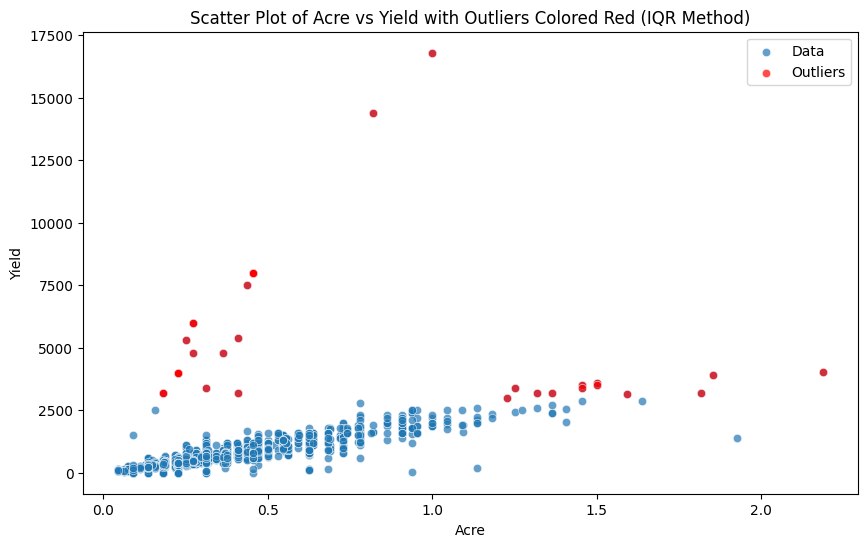

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame with columns 'Acre' and 'Yield'
# Replace 'Acre' and 'Yield' with your actual column names

# Calculate the interquartile range (IQR) for 'Yield'
Q1 = train['Yield'].quantile(0.25)
Q3 = train['Yield'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers (e.g., 7 times the IQR)
threshold = 5

# Identify outliers in 'Yield' based on IQR
outliers_Yield = (train['Yield'] < (Q1 - threshold * IQR)) | (train['Yield'] > (Q3 + threshold * IQR))

# Visualize the scatter plot with outliers colored red
plt.figure(figsize=(10, 6))

# Plot the entire data
sns.scatterplot(x='Acre', y='Yield', data=train, alpha=0.7, label='Data')

# Color outliers in 'Yield' with red
sns.scatterplot(x=train.loc[outliers_Yield, 'Acre'], y=train.loc[outliers_Yield, 'Yield'], color='red', alpha=0.7, label='Outliers')

plt.title('Scatter Plot of Acre vs Yield with Outliers Colored Red (IQR Method)')
plt.xlabel('Acre')
plt.ylabel('Yield')
plt.legend()
plt.show()

# Drop rows with outliers from the DataFrame
train = train[~outliers_Yield]

In [22]:
print(train.shape)

(3839, 40)


In [23]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 4.8 MB/s eta 0:00:00


In [24]:
from flaml import AutoML

automl_settings = {
    "time_budget": 200,  # Maximum time in seconds for training
    "metric": "rmse",  # Metric to optimize
    "task": "regression",  # Task type (classification or regression)
    "log_file_name": "flaml.log",  # Log file name
}

In [57]:
X = train_sub.drop(columns=['Yield'])
y = train_sub['Yield']

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [60]:
automl = AutoML()
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl.logger: 03-24 11:25:06] {1680} INFO - task = regression
[flaml.automl.logger: 03-24 11:25:06] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 03-24 11:25:06] {1789} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 03-24 11:25:06] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 03-24 11:25:06] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-24 11:25:06] {2345} INFO - Estimated sufficient time budget=1262s. Estimated necessary time budget=9s.
[flaml.automl.logger: 03-24 11:25:06] {2392} INFO -  at 0.2s,	estimator lgbm's best error=368.1340,	best estimator lgbm's best error=368.1340
[flaml.automl.logger: 03-24 11:25:06] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-24 11:25:06] {2392} INFO -  at 0.3s,	estimator lgbm's best error=368.1340,	best estimator lgbm's best error=368.1340
[flaml.automl.logger: 03-24 11:25:06] {2219} 

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = automl.predict(X_val)

# Evaluate the model
rmse = mean_squared_error(y_val, y_pred, squared=False)
print("Validation RMSE:", rmse)


In [62]:
bestmodel = automl.model

In [63]:
bestmodel.feature_importances_

array([0.00141807, 0.04455941, 0.01926201, 0.06212576, 0.05921636,
       0.05499435, 0.23399528, 0.32898174, 0.05282413, 0.14262289])

In [31]:
feature_names = train.columns.tolist()

In [35]:
feature_importance_with_labels = zip(feature_names, bestmodel.feature_importances_)

# Sort the features based on their importance
important_features_sorted = sorted(feature_importance_with_labels, key=lambda x: x[1], reverse=True)

# Print the top 10 features with their labels
print("Top 11 most important features:")
for feature, importance in important_features_sorted[:10]:
    print(f"Feature: {feature}, Importance: {importance}")

Top 11 most important features:
Feature: Stubble_use, Importance: 0.5367207992522657
Feature: Threshing_method, Importance: 0.12093920924947366
Feature: Harv_hand_rent, Importance: 0.050590486400191946
Feature: Harv_method, Importance: 0.05018332398494803
Feature: BasalDAP, Importance: 0.048781490984260684
Feature: CropbasalFerts, Importance: 0.023033492528109874
Feature: FirstTopDressFert, Importance: 0.021730696522861494
Feature: StandingWater, Importance: 0.011508811329123176
Feature: OrgFertilizers, Importance: 0.01021165205666121
Feature: Residue_length, Importance: 0.009636717448933043


In [47]:
feature_list = []
for feature,_ in important_features_sorted[:10]:
  feature_list.append(feature)

In [54]:
feature_list.append('Yield')

In [55]:
train_sub = train[feature_list]

In [56]:
train_sub.head()

,Stubble_use,Threshing_method,Harv_hand_rent,Harv_method,BasalDAP,CropbasalFerts,FirstTopDressFert,StandingWater,OrgFertilizers,Residue_length,Yield
0,plowed_in_soil,machine,NaN,machine,NaN,Urea,Urea,2.0,NaN,30,600
1,plowed_in_soil,machine,3.0,hand,15.0,DAP Urea,Urea,3.0,NaN,24,600
2,plowed_in_soil,machine,480.0,hand,4.0,DAP,Urea,2.0,Ganaura FYM,30,225
3,plowed_in_soil,hand,240.0,hand,6.0,DAP Urea,Urea,NaN,Ganaura,26,468
4,plowed_in_soil,machine,NaN,machine,15.0,Urea DAP,Urea,2.0,NaN,24,550


In [ ]:
import pickle

# Assuming you have already trained an ExtraTreesEstimator model and have access to it as 'best_model'

# Save the best model as a pickle file
with open("extra_trees_model.pkl", "wb") as f:
    pickle.dump(best_model, f)